# Initial Attempt at Voice Quality Analysis
**Author:** Jim Maddock  
**Last Updated:** 7-3-19  
**Description:** Analysis script for Voice Comparison Survey Data.

## Load data from CSV

In [5]:
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(forcats)){install.packages("forcats")}
if(!require(EMT)){install.packages("EMT")}
if(!require(rcompanion)){install.packages("rcompanion")}

# import data from file

data_file_path = readline(prompt = "Path to data file: ")
data = read.csv(data_file_path)
#convert csv file to dataframe object
data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))

# convert attention checks to binary variable
data$check1 = ifelse(data$check1 == "An article about dealing with stress", 1, 0)
data$check2 = ifelse(data$check2 == "His constant need for success", 1, 0)
data$check3 = ifelse(data$check3 == "It oxygenates your brain", 1, 0)
data$check4 = ifelse(data$check4 == "2 and 3", 1, 0)
data$check5 = ifelse(data$check5 == "Ask yourself if a thought is really true.", 1, 0)
data$check6 = ifelse(data$check6 == "Everything has to have a purpose", 1, 0)
data$check7 = ifelse(data$check7 == "Do less than you want to do", 1, 0)

# convert rate.speed and rate.experience to ordered factor
data$rate.speed = ordered(data$rate.speed, levels = c("Much too fast", "Too fast", "Just right",
                                                      "Too slow", "Much too slow"))                            
data$rate.experience = ordered(data$rate.experience, levels = c("Excellent", "Good", "OK", "Poor", "Very poor"))

Path to data file: 


Warning message in file(file, "rt"):
“file("") only supports open = "w+" and open = "w+b": using the former”

ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : no lines available in input


## Summary Stats

In [4]:
# Distributions ----
summary(data)

       X                     MID       audio.paused      page.seconds   
 Min.   :  1.0   A1YSYI926BBOHW:  4   Min.   :  1.052   Min.   :   5.0  
 1st Qu.:223.5   A3O5EU9QQV2OS1:  3   1st Qu.:294.372   1st Qu.: 303.0  
 Median :446.0   AR1IWBDA7MC86 :  3   Median :312.888   Median : 327.0  
 Mean   :446.0   A16SAB417Y96G4:  2   Mean   :296.286   Mean   : 383.9  
 3rd Qu.:668.5   A18SXC3JEN1O0U:  2   3rd Qu.:319.574   3rd Qu.: 382.0  
 Max.   :891.0   A19L8SNH73AX1Z:  2   Max.   :403.540   Max.   :5862.0  
                 (Other)       :875   NA's   :53                        
  rate.experience         rate.speed    rate.again    
 Excellent:141    Much too fast:  5   Min.   : 0.000  
 Good     :330    Too fast     :127   1st Qu.: 1.000  
 OK       :283    Just right   :590   Median : 5.000  
 Poor     :115    Too slow     : 99   Mean   : 4.567  
 Very poor: 22    Much too slow: 18   3rd Qu.: 8.000  
                  NA's         : 52   Max.   :10.000  
                               

In [288]:
# number of participants
print(paste("Number of participants:", nrow(data)), quote=FALSE)
# number of voices
print(paste("Number of voices:", length(unique(data$voice))), quote=FALSE)

[1] Number of participants: 891
[1] Number of voices: 18


In [289]:
# number of ppts per voice
as.data.frame(table(data$voice))

Var1,Freq
<fct>,<int>
.Abe,49
.Janice,49
.Jofish,55
Android UK Male,48
Common Voice,41
Deep Speech,50
Deep Speech Nancy,43
Google A,51
Google C,47


In [290]:
# male/female split
as.data.frame(table(data$gender))

Var1,Freq
<fct>,<int>
Female,349
Male,529
Other,2


## Create Group Names for Charts
Comment out lines in groupnames.voice to eliminate a voice from analysis

In [343]:
group_names.voice = c(
  "Deep Speech" = paste("Deep Speech (", nrow(data[data$voice == "Deep Speech",]) ,")", sep = ""),
  "Google A" = paste("Google A (", nrow(data[data$voice == "Google A",]) ,")", sep = ""),
  "Google C" = paste("Google C (", nrow(data[data$voice == "Google C",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  "Voicery Nichole" = paste("Voicery Nichole (", nrow(data[data$voice == "Voicery Nichole",]) ,")", sep = ""),
  "Android UK Male" = paste("Android UK Male (", nrow(data[data$voice == "Android UK Male",]) ,")", sep = ""),
  "iOS Female" = paste("iOS Female (", nrow(data[data$voice == "iOS Female",]) ,")", sep = ""),
  "Deep Speech Nancy" = paste("Deep Speech Nancy (", nrow(data[data$voice == "Deep Speech Nancy",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = ""),
  #"Common Voice" = paste("Common Voice (", nrow(data[data$voice == "Common Voice",]) ,")", sep = ""),
  "Mac Default" = paste("Mac Default (", nrow(data[data$voice == "Mac Default",]) ,")", sep = ""),
  #"Text only" = paste("Text only (", nrow(data[data$voice == "Text only",]) ,")", sep = ""),
  "Windows Female" = paste("Windows Female (", nrow(data[data$voice == "Windows Female",]) ,")", sep = ""),
  "Windows Male" = paste("Windows Male (", nrow(data[data$voice == "Windows Male",]) ,")", sep = "")
)

group_names.voice.polly_vs_deep = c(
  "Deep Speech" = paste("Deep Speech (", nrow(data[data$voice == "Deep Speech",]) ,")", sep = ""),
  "Deep Speech Nancy" = paste("Deep Speech Nancy (", nrow(data[data$voice == "Deep Speech Nancy",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = "")
)

# broken down by gender ----
group_names.gender = c(
  "Male" = paste("Male (", nrow(data[data$gender == "Male",]) ,")"),
  "Female" = paste("Female (", nrow(data[data$gender == "Female",]) ,")")
)

# broken down by headphone use ----
group_names.headphone = c(
  "No" = paste("No headphones (", nrow(data[data$headphones == "No",]) ,")"),
  "Yes" = paste("Headphones (", nrow(data[data$headphones == "Yes",]) ,")")
)

In [292]:
colnames.voice_quality = c(
    'voice.easy',
    'voice.monotone',
    'voice.natural',
    'voice.no_emotion',
    'voice.focus'
)

## Dropout (stop listening) histograms

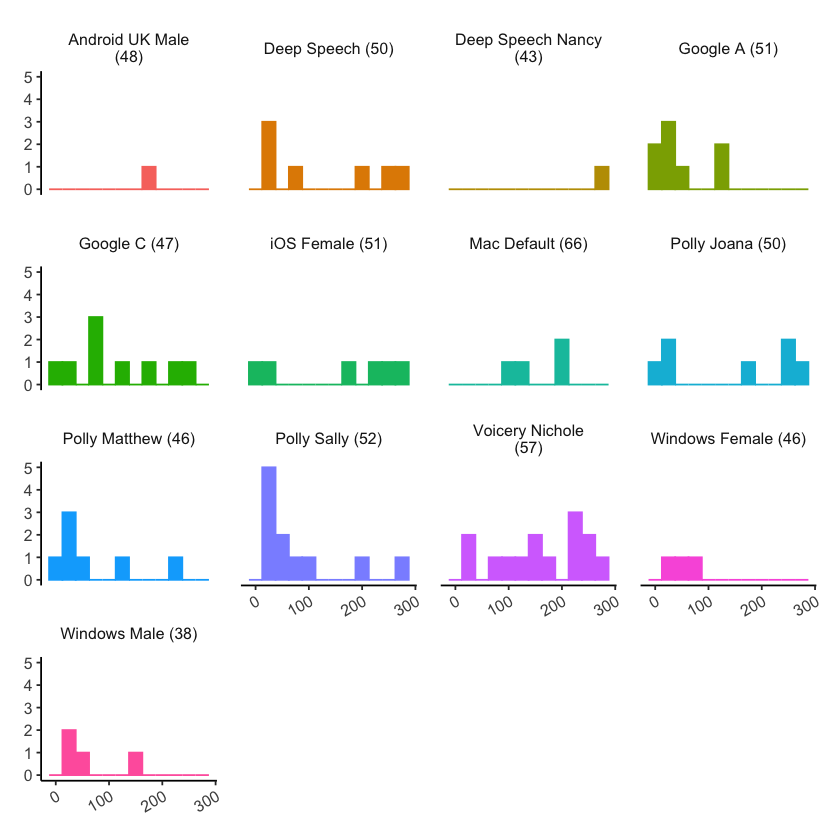

In [293]:
# where did people stop listening to it?
ggplot(subset(data, audio.paused < 280 & voice %in% names(group_names.voice)), aes(x = audio.paused, color = voice, fill = voice)) +
  geom_histogram(stat = "bin", binwidth = 25) +
  facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice, label_wrap_gen(width = 20)), drop = TRUE) +
  guides(color = FALSE, fill=FALSE) + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(1, "lines"))


## Ranked Experience Ratings

In [294]:
# aggregate good + excellent and poor + very poor
# rank by percentage of good ratings per voice
temp = subset(data, voice %in% names(group_names.voice))
table = round(prop.table(table(temp$voice, temp$rate.experience), margin = 1), digits = 3)*100
table[,"Poor"] = table[,"Poor"] + table[,"Very poor"]
table[,"Good"] = table[,"Good"] + table[,"Excellent"]
good = subset(as.data.frame(table[,c("Good","OK","Poor")]), Var2 == "Good")
good[order(-good$Freq),]

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
11,Mac Default,Good,62.1
9,Google C,Good,59.6
18,Windows Male,Good,57.9
13,Polly Matthew,Good,54.3
14,Polly Sally,Good,53.9
12,Polly Joana,Good,50.0
7,Deep Speech Nancy,Good,48.9
17,Windows Female,Good,47.8
8,Google A,Good,47.1


In [295]:
# aggregate good + excellent and poor + very poor
# rank by percentage of poor ratings per voice
temp = subset(data, voice %in% names(group_names.voice))
table = round(prop.table(table(temp$voice, temp$rate.experience), margin = 1), digits = 3)*100
table[,"Poor"] = table[,"Poor"] + table[,"Very poor"]
table[,"Good"] = table[,"Good"] + table[,"Excellent"]
poor = subset(as.data.frame(table[,c("Good","OK","Poor")]), Var2 == "Poor")
poor[order(-poor$Freq),]

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
40,Android UK Male,Poor,41.6
46,iOS Female,Poor,37.2
42,Deep Speech,Poor,32.0
43,Deep Speech Nancy,Poor,18.7
48,Polly Joana,Poor,18.0
44,Google A,Poor,15.7
50,Polly Sally,Poor,15.4
53,Windows Female,Poor,15.2
47,Mac Default,Poor,15.1


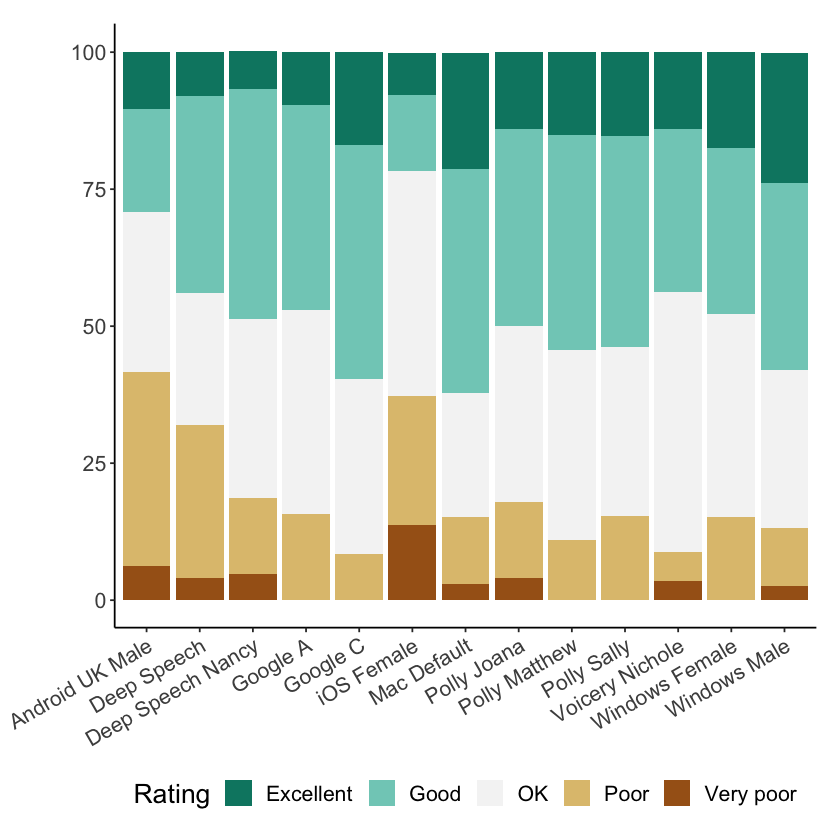

In [180]:
## Rate experience ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice))

ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/experience.png",height=4,width=7)

## Experience by Gender

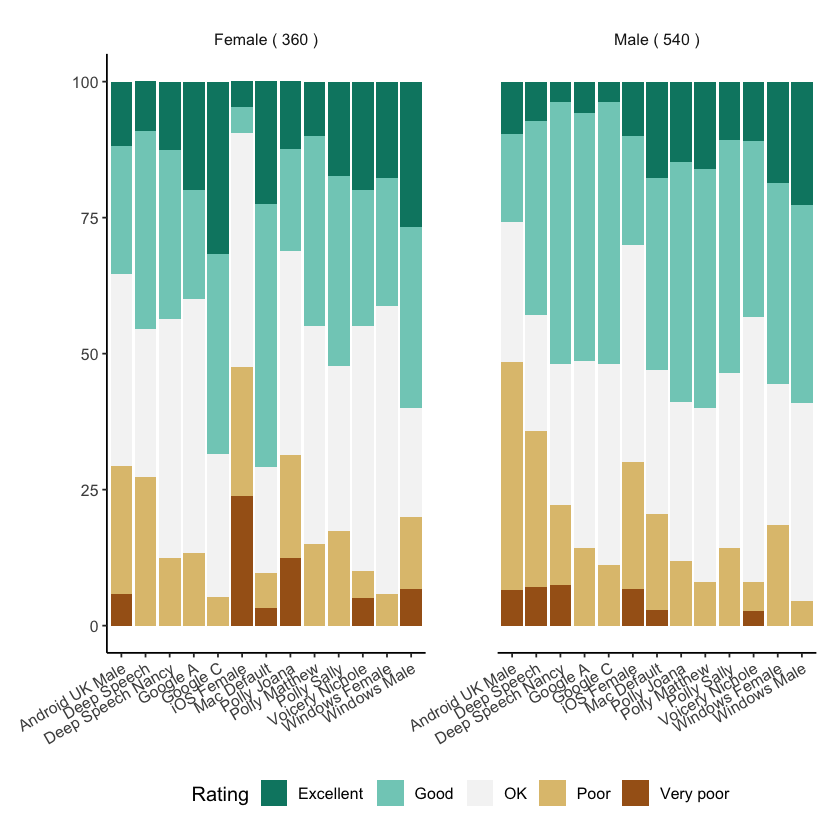

In [296]:
# broken down by gender ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience, data$gender), c(3,1)), digits = 3)*100)
temp = subset(temp, Var3 %in% names(group_names.gender) & Var1 %in% names(group_names.voice))
ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  facet_wrap( ~ Var3, labeller = as_labeller(group_names.gender)) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/gender.png",height=4,width=10)

In [191]:
# perform wilcox ranked sum test on rating differences by gender
temp = subset(data, gender %in% names(group_names.gender) & voice %in% names(group_names.voice))
wilcox.test(as.numeric(rate.experience) ~ gender, data=temp)


	Wilcoxon rank sum test with continuity correction

data:  as.numeric(rate.experience) by gender
W = 55232, p-value = 0.4085
alternative hypothesis: true location shift is not equal to 0


In [192]:
# perform wilcox ranked sum test on rating differences by gender
# on use deep speech and amazon polly voices
temp = subset(data, gender %in% names(group_names.gender) & voice %in% names(group_names.voice.polly_vs_deep))
wilcox.test(as.numeric(rate.experience) ~ gender, data=temp)


	Wilcoxon rank sum test with continuity correction

data:  as.numeric(rate.experience) by gender
W = 7330.5, p-value = 0.3755
alternative hypothesis: true location shift is not equal to 0


In [252]:
# convert rating scale to numeric
# find mean rating for male and female groups
# get diff between mean male and mean female rating
temp = data
temp$rate.experience.num = as.numeric(fct_rev(temp$rate.experience))
male = subset(temp, voice %in% names(group_names.voice) & gender == "Male")
female = subset(temp, voice %in% names(group_names.voice) & gender == "Female")
f_mean = aggregate(rate.experience.num ~ voice, data=female, FUN = "mean")
m_mean = aggregate(rate.experience.num ~ voice, data=male, FUN = "mean")
means = merge(m_mean,f_mean,by = "voice")
means$diff = (means$rate.experience.num.x - means$rate.experience.num.y)
means[order(means$diff),]

,voice,rate.experience.num.x,rate.experience.num.y,diff
,<fct>,<dbl>,<dbl>,<dbl>
5,Google C,3.444444,3.947368,-0.50292398
7,Mac Default,3.470588,3.806452,-0.33586338
1,Android UK Male,2.806452,3.117647,-0.31119545
11,Text only,3.833333,4.107143,-0.27380952
2,Deep Speech,3.071429,3.272727,-0.20129870
3,Deep Speech Nancy,3.259259,3.437500,-0.17824074
12,Voicery Nichole,3.432432,3.500000,-0.06756757
4,Google A,3.428571,3.466667,-0.03809524
10,Polly Sally,3.500000,3.521739,-0.02173913


## Experience by Headphones

Warning message:
“Removed 10 rows containing missing values (position_stack).”Warning message:
“Removed 10 rows containing missing values (position_stack).”

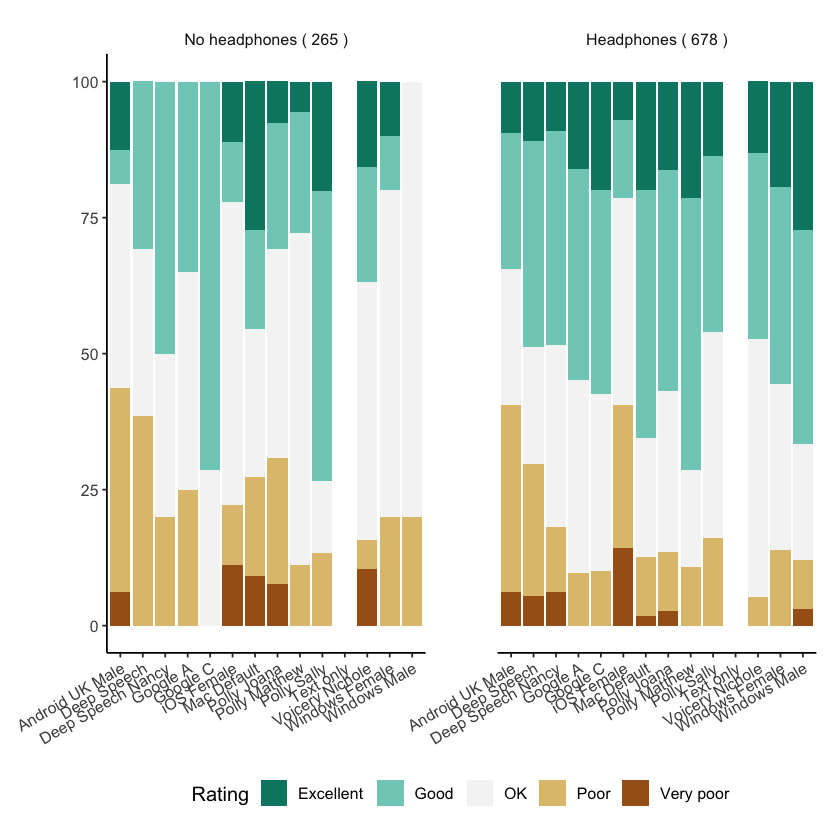

In [58]:
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience, data$headphones), c(3,1)), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice))

ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  facet_wrap( ~ Var3, labeller = as_labeller(group_names.headphone)) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/headphones.png",height=4,width=10)

In [297]:
# perform wilcox ranked sum test on rating differences by gender
temp = subset(data, voice %in% names(group_names.voice))
wilcox.test(as.numeric(rate.experience) ~ headphones, data=data)


	Wilcoxon rank sum test with continuity correction

data:  as.numeric(rate.experience) by headphones
W = 75398, p-value = 0.002796
alternative hypothesis: true location shift is not equal to 0


In [300]:
# convert rating scale to numeric
# find mean rating for headphones and non-headphones groups
temp = subset(data, voice %in% names(group_names.voice))
temp$rate.experience.num = as.numeric(fct_rev(temp$rate.experience))
print(paste("Mean voice rating WITH headphones:", mean(subset(temp, headphones == "Yes")$rate.experience.num)), quote=FALSE)
temp = subset(data, voice %in% names(group_names.voice))
temp$rate.experience.num = as.numeric(fct_rev(temp$rate.experience))
print(paste("Mean voice rating WITHOUT headphones:", mean(subset(temp, headphones == "No")$rate.experience.num)), quote=FALSE)

[1] Mean voice rating WITH headphones: 3.46346555323591
[1] Mean voice rating WITHOUT headphones: 3.18674698795181


In [301]:
# convert rating scale to numeric
# find mean rating for headphones and non-headphones groups
# get diff between mean headphones and mean non-headphones rating
temp = data
temp$rate.experience.num = as.numeric(fct_rev(temp$rate.experience))
no_headphone = subset(temp, voice %in% names(group_names.voice) & headphones == "No")
headphone = subset(temp, voice %in% names(group_names.voice) & headphones == "Yes")
h_mean = aggregate(rate.experience.num ~ voice, data=headphone, FUN = "mean")
nh_mean = aggregate(rate.experience.num ~ voice, data=no_headphone, FUN = "mean")
means = merge(h_mean,nh_mean,by = "voice")
means$diff = (means$rate.experience.num.x - means$rate.experience.num.y)
means[order(means$diff),]

,voice,rate.experience.num.x,rate.experience.num.y,diff
,<fct>,<dbl>,<dbl>,<dbl>
10,Polly Sally,3.432432,3.800000,-0.36756757
6,iOS Female,2.738095,3.000000,-0.26190476
5,Google C,3.675000,3.714286,-0.03928571
3,Deep Speech Nancy,3.333333,3.300000,0.03333333
1,Android UK Male,2.968750,2.812500,0.15625000
11,Voicery Nichole,3.552632,3.263158,0.28947368
2,Deep Speech,3.243243,2.923077,0.32016632
7,Mac Default,3.709091,3.363636,0.34545455
12,Windows Female,3.611111,3.100000,0.51111111


## Voice speed

In [217]:
# aggregate "much too fast" + "too fast" and "much too slow" + "too slow"
# order by percentage of "too fast" ratings
temp = subset(data, voice %in% names(group_names.voice))
table = round(prop.table(table(temp$voice, temp$rate.speed), margin = 1), digits = 3)*100
table[,"Too fast"] = table[,"Much too fast"] + table[,"Too fast"]
table[,"Too slow"] = table[,"Much too slow"] + table[,"Too slow"]
table[order(-table[,"Too fast"]),"Too fast"]

iOS Female       Deep Speech     Polly Matthew       Polly Joana 
             41.2              28.0              23.9              22.0 
Deep Speech Nancy       Mac Default          Google A    Windows Female 
             18.6              16.7              15.7              13.0 
  Voicery Nichole      Windows Male       Polly Sally          Google C 
             12.3               7.9               7.7               6.4 
  Android UK Male              .Abe           .Janice           .Jofish 
              4.2               NaN               NaN               NaN 
     Common Voice         Text only 
              NaN               NaN

In [302]:
# aggregate "much too fast" + "too fast" and "much too slow" + "too slow"
# order by percentage of "too slow" ratings
temp = subset(data, voice %in% names(group_names.voice))
table = round(prop.table(table(temp$voice, temp$rate.speed), margin = 1), digits = 3)*100
table[,"Too fast"] = table[,"Much too fast"] + table[,"Too fast"]
table[,"Too slow"] = table[,"Much too slow"] + table[,"Too slow"]
table[order(-table[,"Too slow"]),"Too slow"]

Android UK Male    Windows Female      Windows Male       Polly Sally 
             29.2              23.9              18.5              17.3 
         Google A          Google C   Voicery Nichole       Mac Default 
             15.7              12.8              12.3              12.1 
      Polly Joana Deep Speech Nancy       Deep Speech        iOS Female 
             12.0              11.6              10.0               9.8 
    Polly Matthew              .Abe           .Janice           .Jofish 
              8.7               NaN               NaN               NaN 
     Common Voice         Text only 
              NaN               NaN

In [303]:
# order by percentage of "just right" ratings
temp = subset(data, voice %in% names(group_names.voice))
table = round(prop.table(table(temp$voice, temp$rate.speed), margin = 1), digits = 3)*100
table[order(-table[,"Just right"]),"Just right"]

Google C   Voicery Nichole       Polly Sally      Windows Male 
             80.9              75.4              75.0              73.7 
      Mac Default Deep Speech Nancy          Google A     Polly Matthew 
             71.2              69.8              68.6              67.4 
  Android UK Male       Polly Joana    Windows Female       Deep Speech 
             66.7              66.0              63.0              62.0 
       iOS Female              .Abe           .Janice           .Jofish 
             49.0               NaN               NaN               NaN 
     Common Voice         Text only 
              NaN               NaN

Warning message:
“Removed 5 rows containing missing values (position_stack).”Warning message:
“Removed 5 rows containing missing values (position_stack).”

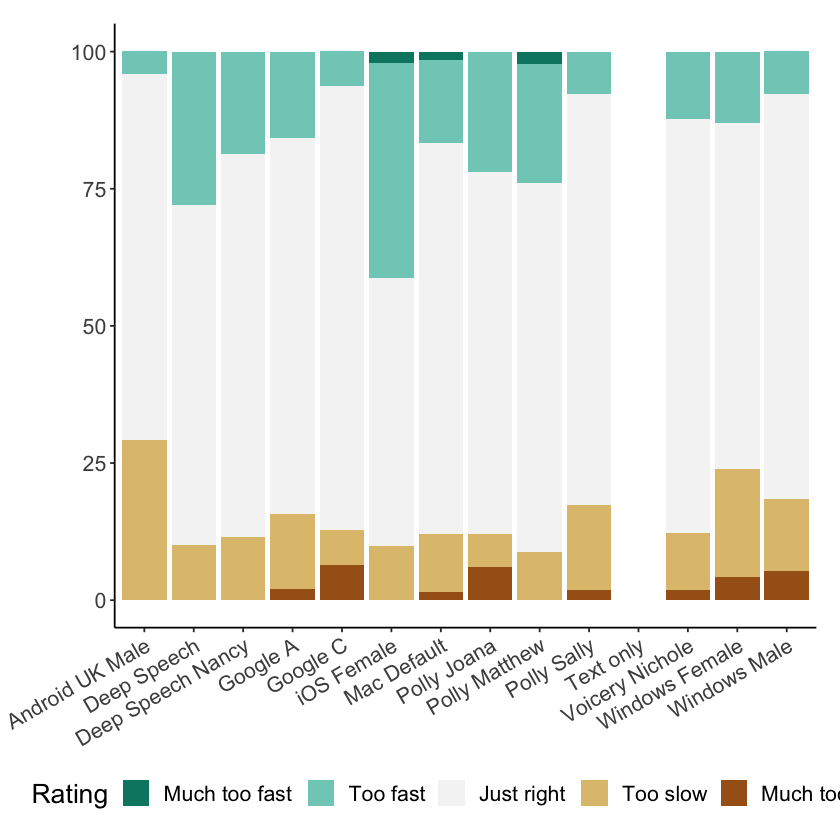

In [62]:
## Rate speed ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.speed), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice))

ggplot(temp, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity") + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/speed.png",height=4,width=7)

In [86]:
# perform Kruskal-Wallis rank sum test to determine statistical difference between speed ratings
temp = subset(data, voice %in% names(group_names.voice))
kruskal.test(rate.speed ~ voice, data = temp)


	Kruskal-Wallis rank sum test

data:  rate.speed by voice
Kruskal-Wallis chi-squared = 41.276, df = 12, p-value = 4.406e-05


## Comprehension Grades

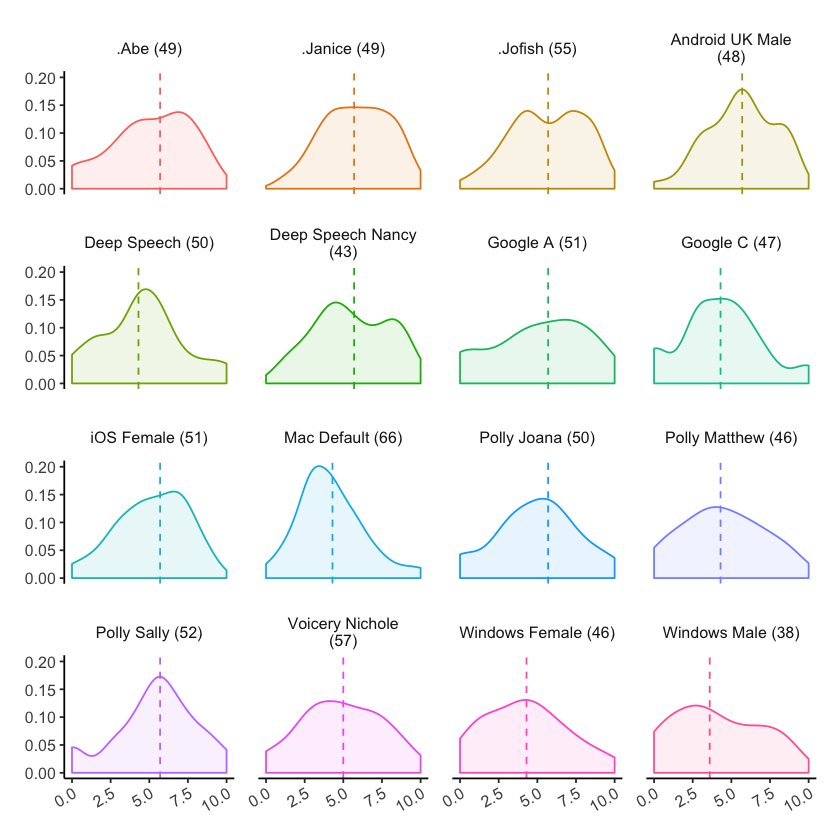

In [345]:
temp = subset(data, voice %in% names(group_names.voice))

median = aggregate(grade ~ voice, data=temp, FUN = "median")

ggplot(temp, aes(x = grade, color = voice, fill = voice)) +
  #geom_histogram(stat = "bin", binwidth = 1) +
  geom_density(alpha = 0.1) +
  facet_wrap( ~ voice, ncol = 4, labeller = as_labeller(group_names.voice, label_wrap_gen(width = 20)), drop = TRUE) +
  guides(color = FALSE, fill=FALSE) + 
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(1, "lines")) +
  geom_vline(data=median, aes(xintercept=grade, color=voice),
             linetype="dashed")

ggsave("/Users/jmaddock/data/voice_comparison/img/grades.png",height=5,width=7)

In [87]:
# anova to determine relationship between voice and grade
temp = subset(data, voice %in% names(group_names.voice))
summary(aov(grade ~ voice, data = temp))

             Df Sum Sq Mean Sq F value Pr(>F)   
voice        13    180  13.884   2.202 0.0083 **
Residuals   683   4306   6.305                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [88]:
# Kruskal-Wallis rank sum test to determine relationship between voice and grade
temp = subset(data, voice %in% names(group_names.voice))
kruskal.test(grade ~ voice, data = temp)


	Kruskal-Wallis rank sum test

data:  grade by voice
Kruskal-Wallis chi-squared = 31.781, df = 13, p-value = 0.002588


In [344]:
# median grades by voice
temp = subset(data, voice %in% names(group_names.voice))

median = aggregate(grade ~ voice, data=temp, FUN = "median")
median[order(-median$grade),]

,voice,grade
,<fct>,<dbl>
1,.Abe,5.7
2,.Janice,5.7
3,.Jofish,5.7
4,Android UK Male,5.7
6,Deep Speech Nancy,5.7
7,Google A,5.7
9,iOS Female,5.7
11,Polly Joana,5.7
13,Polly Sally,5.7


In [105]:
summary(median$grade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.60    4.30    5.35    5.00    5.70    5.70 

## Voice Characteristics

In [342]:
temp = subset(data, voice %in% names(group_names.voice))

voice.easy = as.data.frame.matrix(round(table(temp$voice, temp$voice.easy)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.monotone = as.data.frame.matrix(round(table(temp$voice, temp$voice.monotone)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.natural = as.data.frame.matrix(round(table(temp$voice, temp$voice.natural)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.no_emotion = as.data.frame.matrix(round(table(temp$voice, temp$voice.no_emotion)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.focus = as.data.frame.matrix(round(table(temp$voice, temp$voice.focus)/(as.vector(t(table(temp$voice)))), digits = 3)*100)

result = data.frame(voice.easy,voice=rownames(voice.easy))
result = merge(result, data.frame(voice.monotone,voice = rownames(voice.monotone)), by="voice")
result = merge(result, data.frame(voice.natural,voice = rownames(voice.natural)), by="voice")
result = merge(result, data.frame(voice.no_emotion,voice = rownames(voice.no_emotion)), by="voice")
result = merge(result, data.frame(voice.focus,voice = rownames(voice.focus)), by="voice")
result

voice,Voice.was.easy.to.comprehend.,Voice.is.monotone.,Voice.sounded.natural.,Voice.lacked.emotion.personality.,I.could.focus.on.the.content.
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
.Abe,NaN,NaN,NaN,NaN,NaN
.Janice,NaN,NaN,NaN,NaN,NaN
.Jofish,NaN,NaN,NaN,NaN,NaN
Android UK Male,22.9,75.0,12.5,72.9,27.1
Common Voice,NaN,NaN,NaN,NaN,NaN
Deep Speech,26.0,70.0,20.0,60.0,14.0
Deep Speech Nancy,58.1,58.1,11.6,83.7,51.2
Google A,49.0,52.9,19.6,52.9,45.1
Google C,55.3,48.9,21.3,53.2,55.3
